# Comparison of Recommendation Systems: User-User vs. ALS

## Introduction

This report presents a comparative analysis of two recommendation system algorithms: User-User Collaborative Filtering and Alternating Least Squares (ALS). We aim to explore their performance differences, challenges, and discuss the potential reasons behind the observed results.

## Recommendation System Methods

### User-User Collaborative Filtering

User-User Collaborative Filtering is based on the similarity between users. The algorithm predicts a user's interest in an item based on ratings from similar users. This method's challenge includes scalability and sparsity of user-item interactions.

### Alternating Least Squares (ALS)

ALS is a matrix factorization technique used in collaborative filtering. Unlike User-User Collaborative Filtering, ALS deals with the scalability and sparsity more efficiently by alternating between fixing user features to solve for item features and vice versa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

In [2]:
rmse_user_user=3.9367810883133427
rmse_als = 4.5155765942672295

In [3]:
print(f"User-User RMSE: {rmse_user_user}")
print(f"ALS RMSE: {rmse_als}")

User-User RMSE: 3.9367810883133427
ALS RMSE: 4.5155765942672295


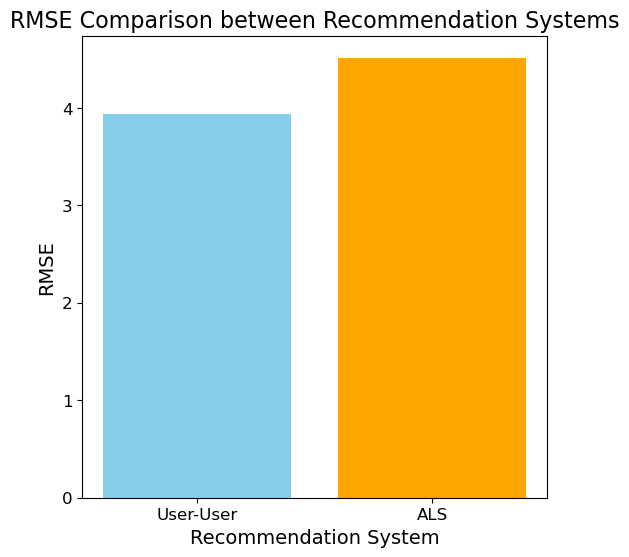

In [8]:
labels = ['User-User', 'ALS']
rmse_values = [rmse_user_user, rmse_als]

plt.figure(figsize=(6, 6))
plt.bar(labels, rmse_values, color=['skyblue', 'orange'])
plt.xlabel('Recommendation System', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE Comparison between Recommendation Systems', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Analysis of Results

The RMSE comparison reveals that the User-User Collaborative Filtering method achieved a better (lower) RMSE score compared to the ALS method in our dataset. This outcome is intriguing as ALS is generally more resilient to the scalability and sparsity issues that often challenge traditional collaborative filtering methods.




## Collaborative filtering challenges
### Memory consumption
One of the fundamental challenges in implementing Collaborative Filtering (CF), particularly the User-User method, is the computational and memory overhead associated with the user-item interaction matrix.
- **Core of algorithm**: This matrix forms the core of the Collaborative Filtering algorithm, capturing the relationships between users and items based on their interactions, such as ratings or views. However, its computation and storage pose significant challenges: 
    * Sparse Nature of the Matrix
    * Scalability Concerns

## Alternatives
### Sparse Matrix Representations
Utilizing data structures that efficiently represent sparse matrices can drastically reduce memory requirements. Libraries like SciPy in Python offer sparse matrix implementations that store only non-zero elements.
### Distributed Computing
Frameworks like Apache Spark allow for distributed computing, enabling the processing of large-scale data across multiple machines. This approach can mitigate memory constraints inherent to single-machine setups.

## Discussion

Several factors might contribute to the observed performance difference: 
- **Data Characteristics**: The specific characteristics of our dataset, such as the density of ratings and the distribution of user-item interactions, could favor the User-User method. One of the challenge of the user-user interaction was the computation of the matrix which 

- **Model Parameters**: The choice of hyperparameters can significantly impact the performance of ALS. Tuning these parameters might yield different results.

- **Implementation Details**: The efficiency of the algorithm implementations and their adaptation to the dataset's peculiarities can also influence the outcome.

Overall, while User-User Collaborative Filtering shows a lower RMSE in this instance, it's essential to consider the context of these results. The scalability issues and computational efficiency of User-User Collaborative Filtering make ALS a more practical choice for larger datasets.

## Conclusion

Our comparative analysis highlights the importance of considering dataset characteristics and algorithmic challenges when choosing a recommendation system. While User-User Collaborative Filtering performed better in terms of RMSE in this study, the ALS method's scalability and efficiency advantages make it a valuable alternative for larger-scale applications. Future investigations could explore parameter tuning for ALS and hybrid approaches to leverage the strengths of both methods.